In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "/Users/jbeiting/Desktop/CS_539/Team_assignment_4"]).decode("utf8"))

Bagged_Tree_MNIST.ipynb
Classification_Tree_MNIST.ipynb
Gradient_Booster_MNIST.ipynb
MNIST_RandomForest.ipynb
Stacking_Ensemble_MNIST.ipynb
mnist_bgc.csv
mnist_clf.csv
mnist_rf.csv
test.csv
train.csv



In [2]:
train = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/train.csv')
test = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/test.csv')

In [3]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_x = train.iloc[0:2100,1:]
df_y = train.iloc[0:2100,0]
df_x.shape

(2100, 784)

In [6]:
def print_image(row, df):
    temp = df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

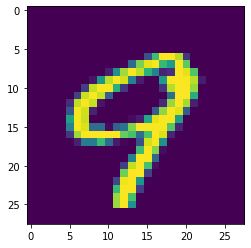

In [7]:
print_image(100, df_x)

In [8]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 100)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (1680, 784)
X_test shape:  (420, 784)


In [9]:
# Initializing Support Vector classifier
clf_svc = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# Initializing Multi-layer perceptron  classifier
clf_mlp = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

# Initialing Nu Support Vector classifier
clf_nusvc = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

# Initializing Random Forest classifier
clf_rfc = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)

In [10]:
classifiers = [('svc', clf_svc),
               ('mlp', clf_mlp),                             
               ('nusvc', clf_nusvc),
               ('rfc', clf_rfc)]

In [11]:
clf = StackingClassifier(estimators = classifiers, final_estimator=LogisticRegression(),stack_method = 'auto',
                         n_jobs = -1, passthrough = False)

In [12]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('svc',
                                SVC(C=50, degree=1, gamma='auto',
                                    probability=True)),
                               ('mlp',
                                MLPClassifier(alpha=0.1,
                                              hidden_layer_sizes=(10, 10, 10),
                                              max_iter=2000,
                                              random_state=1000)),
                               ('nusvc',
                                NuSVC(degree=1, nu=0.25, probability=True)),
                               ('rfc',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=0.005,
                                                       min_samples_split=0.005,
                                                       n_estimators=500,
                                                       n_jobs=-1,
            

In [16]:
pred = clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       1.00      0.95      0.97        39
           2       1.00      0.95      0.97        59
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        33
           5       0.98      1.00      0.99        44
           6       0.98      1.00      0.99        46
           7       0.92      0.97      0.95        36
           8       0.98      0.98      0.98        43
           9       0.95      1.00      0.98        42

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420

Confusion Matrix: 
 [[40  0  0  0  0  0  1  0  0  0]
 [ 0 37  0  0  0  1  0  0  1  0]
 [ 0  0 56  0  0  0  0  3  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0

In [17]:
# Cross validation
clf.fit(df_x, df_y)
score = cross_val_score(clf, df_x, df_y)
print('Score: ', np.mean(score))

Score:  0.930952380952381


In [18]:
pred = pd.Series(pred,name = "Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_se.csv", index = False)